In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import torchvision.datasets

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [11]:
X_train.size()

torch.Size([60000, 28, 28])

In [55]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [56]:
X_train = X_train.float()
X_test = X_test.float()

In [57]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [58]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

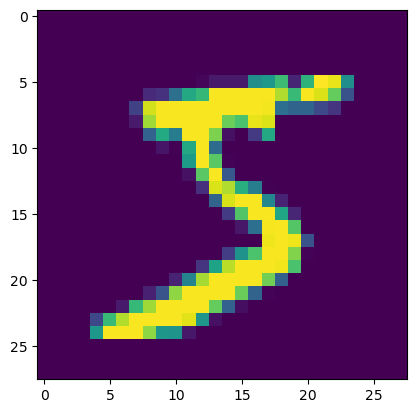

tensor(5)


In [59]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [60]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [61]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x


mnist_net = MNISTNet(100)

In [62]:
# torch.cuda.is_available()

In [63]:
# !nvidia-smi

In [64]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [65]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [71]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test
y_test = y_test

for epoch in range(10000):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index + batch_size]

        X_batch = X_train[batch_indexes]  #.to(device)
        y_batch = y_train[batch_indexes]  #.to(device)

        preds = mnist_net.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9160)
tensor(0.9253)
tensor(0.9270)
tensor(0.9248)
tensor(0.9289)
tensor(0.9291)
tensor(0.9291)
tensor(0.9347)
tensor(0.9316)
tensor(0.9272)
tensor(0.9322)
tensor(0.9365)
tensor(0.9374)
tensor(0.9370)
tensor(0.9371)
tensor(0.9375)
tensor(0.9339)
tensor(0.9389)
tensor(0.9431)
tensor(0.9380)
tensor(0.9390)
tensor(0.9357)
tensor(0.9395)
tensor(0.9423)
tensor(0.9448)
tensor(0.9470)
tensor(0.9408)


KeyboardInterrupt: 

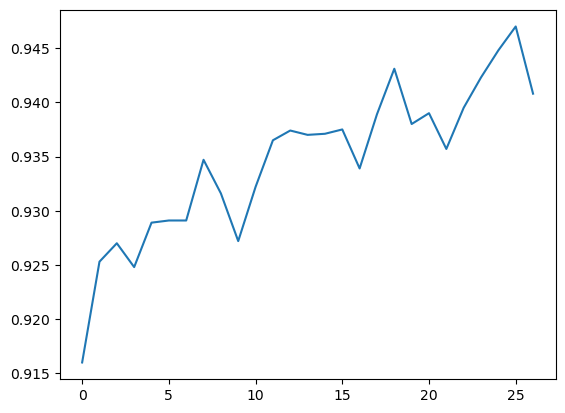

In [74]:
plt.plot(test_accuracy_history)

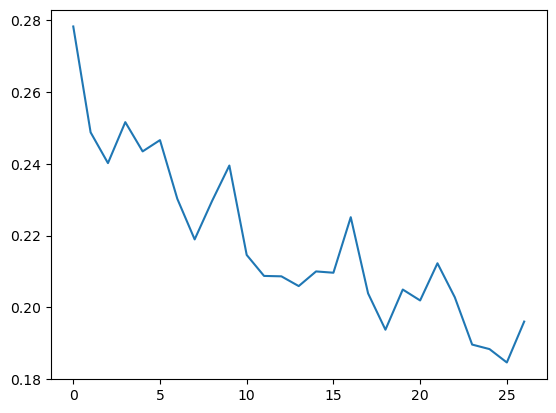

In [73]:
plt.plot(list(map(lambda x: x.detach().numpy(), test_loss_history)))

In [163]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative = torch.mm(x,w.t())+b

# Проверка осуществляется автоматически вызовом функции
print(fc_out == fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

tensor([[True, True, True]])


In [162]:
torch.mm(x,w.t())+b

tensor([[381., 682., 983.]])

In [176]:
conv = torch.nn.Conv2d(1,1,(3,3),stride=2,padding=1,bias=False)
conv.weight.data = torch.FloatTensor([[[
    [0, 1, 2],
    [1, -1, 0],
    [1, 0, -2]]]])
X = torch.FloatTensor([[[
    [4, 2, -1],
    [-6, 0, 5],
    [3, 2, 2]]]])

In [178]:
conv(X)

tensor([[[[-4.,  3.],
          [-9.,  5.]]]], grad_fn=<ConvolutionBackward0>)

In [168]:
torch.tensor([[0, 1, 2],[1, -1, 0],[1, 0, -2]])

tensor([[ 0,  1,  2],
        [ 1, -1,  0],
        [ 1,  0, -2]])

In [183]:
import torch

# Создаем входной массив из двух изображений RGB 3*3
input_images = torch.FloatTensor(
    [[[[0,  1,  2],
       [3,  4,  5],
       [6,  7,  8]],

      [[9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]],

      [[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]]],


     [[[27, 28, 29],
       [30, 31, 32],
       [33, 34, 35]],

      [[36, 37, 38],
       [39, 40, 41],
       [42, 43, 44]],

      [[45, 46, 47],
       [48, 49, 50],
       [51, 52, 53]]]])


def get_padding2d(input_images):
    m = torch.nn.ConstantPad2d(1, 0)
    padded_images = m(input_images)# добавить нулей с четырех сторон каждого изображения
    return padded_images


correct_padded_images = torch.tensor(
    [[[[0.,  0.,  0.,  0.,  0.],
       [0.,  0.,  1.,  2.,  0.],
       [0.,  3.,  4.,  5.,  0.],
       [0.,  6.,  7.,  8.,  0.],
       [0.,  0.,  0.,  0.,  0.]],

      [[0.,  0.,  0.,  0.,  0.],
       [0.,  9., 10., 11.,  0.],
       [0., 12., 13., 14.,  0.],
       [0., 15., 16., 17.,  0.],
       [0.,  0.,  0.,  0.,  0.]],

      [[0.,  0.,  0.,  0.,  0.],
       [0., 18., 19., 20.,  0.],
       [0., 21., 22., 23.,  0.],
       [0., 24., 25., 26.,  0.],
       [0.,  0.,  0.,  0.,  0.]]],


     [[[0.,  0.,  0.,  0.,  0.],
       [0., 27., 28., 29.,  0.],
       [0., 30., 31., 32.,  0.],
       [0., 33., 34., 35.,  0.],
       [0.,  0.,  0.,  0.,  0.]],

      [[0.,  0.,  0.,  0.,  0.],
       [0., 36., 37., 38.,  0.],
       [0., 39., 40., 41.,  0.],
       [0., 42., 43., 44.,  0.],
       [0.,  0.,  0.,  0.,  0.]],

      [[0.,  0.,  0.,  0.,  0.],
       [0., 45., 46., 47.,  0.],
       [0., 48., 49., 50.,  0.],
       [0., 51., 52., 53.,  0.],
       [0.,  0.,  0.,  0.,  0.]]]])

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(torch.allclose(get_padding2d(input_images), correct_padded_images))

True
